# Airbnb Boston Data Analysis

## CRISP-DM Process

![CRISP-DM](pictures/CRISP-DM_Methodology.resized.png)



## 1. Business Understanding

1. Neighborhoods with highest listings
2. Most and least expensive neighborhoods
3. Pricing fluctuations in a monthly basis
4. Property types and room types listed the most
5. Features that influence the property pricing
6. Model to predict property pricing

## 2. Data Understanding

### Import Libraries

In [357]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

### Read data from csv files.

**Listings**: Contains descriptions and review score

**Reviews**: Contains id for each reviewer and comments

**Calendar**: Contains listing id and the price and availability for that day


In [358]:
df_listings = pd.read_csv("./data/listings.csv") 
df_calendar = pd.read_csv("./data/calendar.csv")

### *Listing* Dataset

#### Overview

In [359]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [360]:
# Number of rows and columns in the dataset
print("# Rows : {}\n# Columns : {}".format(df_listings.shape[0], df_listings.shape[1]))

# Rows : 3585
# Columns : 95


In [361]:
# Descriptive statistics
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


#### Missing values

In [362]:
# Number of missing values in the dataset
print("# missing values : {}".format(df_listings.isnull().sum().sum()))

# Number of columns with missing values
print("# columns with missing values : {}".format(len(df_listings.columns[df_listings.isnull().sum() > 0])))

# Columns with more than 75% of missing values
print("Columns with more than 75% of missing values :\n{}".format(df_listings.columns[df_listings.isnull().mean() > 0.75].values))

# missing values : 50229
# columns with missing values : 44
Columns with more than 75% of missing values :
['neighbourhood_group_cleansed' 'square_feet' 'weekly_price'
 'monthly_price' 'has_availability' 'license' 'jurisdiction_names']


#### Reviews score distribution plots

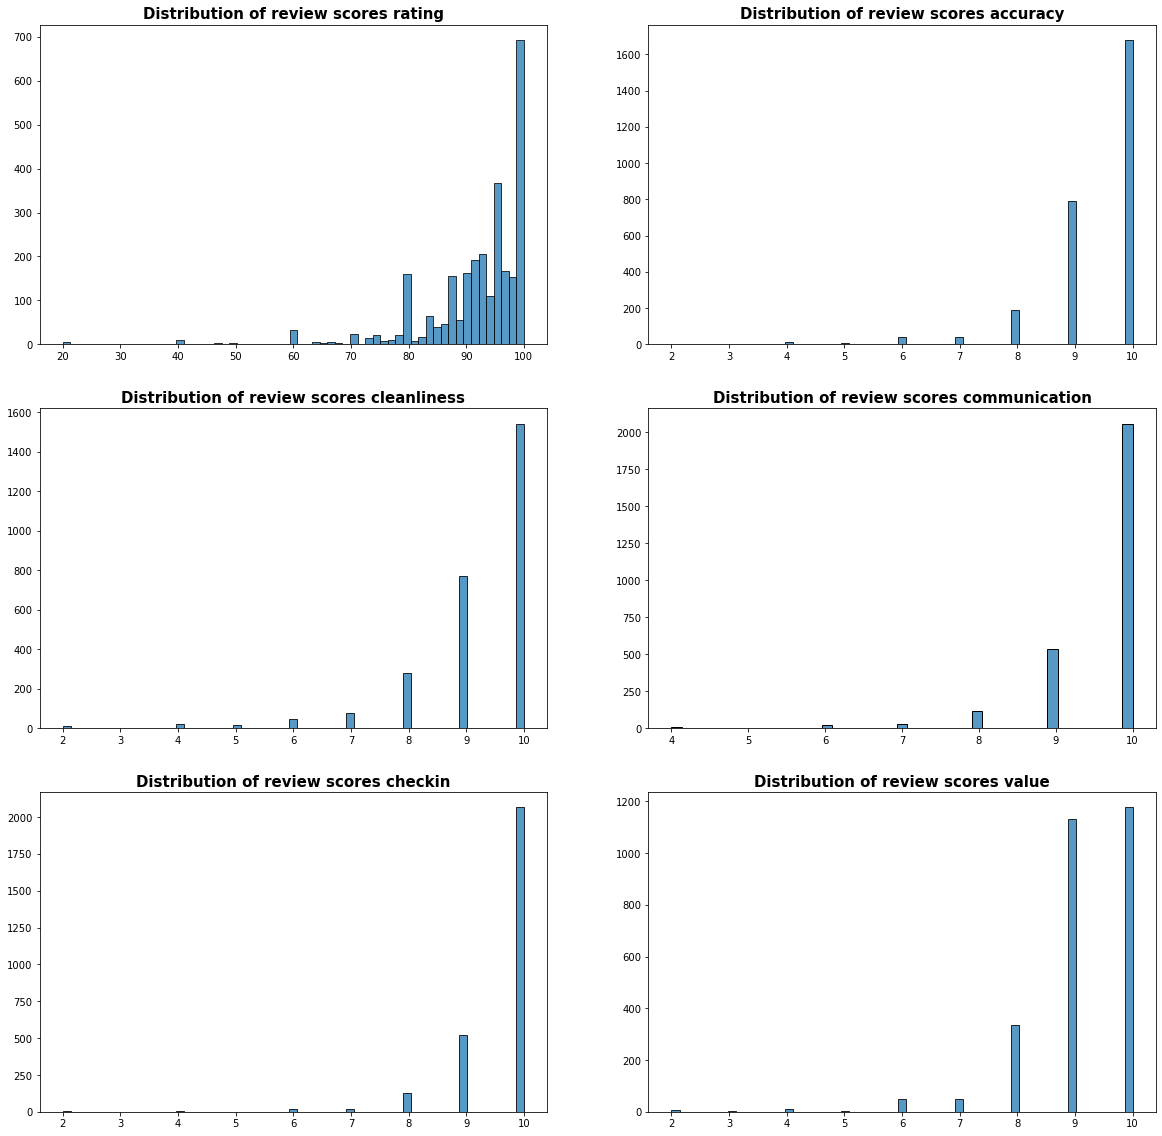

In [363]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.histplot(df_listings['review_scores_rating'])
plt.title('Distribution of review scores rating',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,2)
sns.histplot(df_listings['review_scores_accuracy'])
plt.title('Distribution of review scores accuracy',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,3)
sns.histplot(df_listings['review_scores_cleanliness'])
plt.title('Distribution of review scores cleanliness',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,4)
sns.histplot(df_listings['review_scores_communication'])
plt.title('Distribution of review scores communication',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,5)
sns.histplot(df_listings['review_scores_checkin'])
plt.title('Distribution of review scores checkin',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,6)
sns.histplot(df_listings['review_scores_value'])
plt.title('Distribution of review scores value',  weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('')

plt.savefig('./pictures/Review_Scores_Distribution.png', bbox_inches ='tight')


### *Calendar* Dataset

#### Overview

In [364]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [365]:
# Number of rows and columns in the dataset
print("# Rows : {}\n# Columns : {}".format(df_calendar.shape[0], df_calendar.shape[1]))

# Rows : 1308890
# Columns : 4


In [366]:
# Descriptive statistics
df_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


#### Missing values

In [367]:
# Number of missing values column wise
print("# Missing values column wise :\n{}".format(df_calendar.isnull().sum()))

# % of missing in column 'price'
print("# Percentage of missing in column 'price' : {} %".format(int(df_calendar['price'].isnull().mean()*100)))

# Missing values column wise :
listing_id         0
date               0
available          0
price         665853
dtype: int64
# Percentage of missing in column 'price' : 50 %


## 3. Data Preparation

### *Listing* data wrangling

In [368]:
# Drop unnecessary columns
cols_to_drop = ['id', 
            'scrape_id', 
            'last_scraped',
            'host_id',
            'host_name',
            'host_since',
            'host_location',
            'host_about',
            'host_verifications', 
            'host_neighbourhood',           
            'street',
            'neighbourhood',
            'neighbourhood_group_cleansed',
            'city',
            'state',
            'zipcode',
            'market',
            'country_code',
            'country',
            'weekly_price',
            'monthly_price',
            'square_feet',
           'license',
           'jurisdiction_names',
           'smart_location',
           'calendar_last_scraped',
           'calendar_updated',
           'first_review', 
            'last_review',
           'require_guest_profile_picture',
           'require_guest_phone_verification',          
           'requires_license',
            'has_availability',
            'experiences_offered',
            'house_rules'            
           ]

df_listings.drop(cols_to_drop, axis = 1, inplace = True)

#### *Rate* columns

In [369]:
# No of null values
df_listings[['host_response_rate', 'host_acceptance_rate', 'host_response_time']].isnull().sum()

host_response_rate      471
host_acceptance_rate    471
host_response_time      471
dtype: int64

In [370]:
# Data type
df_listings[['host_response_rate', 'host_acceptance_rate', 'host_response_time']].dtypes

host_response_rate      object
host_acceptance_rate    object
host_response_time      object
dtype: object

In [371]:
# Fill na with ffill/bfill since it is an object type and cannot be interpreted with numerical methods to fillna
df_listings['host_response_rate'].fillna(method = 'backfill', inplace = True)
df_listings['host_acceptance_rate'].fillna(method = 'backfill', inplace = True)
df_listings['host_response_time'].fillna(method = 'backfill', inplace = True)


In [372]:
# Preview of host_response_rate and host_acceptance_rate column values (contains % character that needs to be removed)
df_listings[['host_response_rate', 'host_acceptance_rate']][1:5]

,host_response_rate,host_acceptance_rate
1,100%,100%
2,100%,88%
3,100%,50%
4,100%,100%


In [373]:
# Remove % sign and convert the data type to int
df_listings['host_response_rate'] = (df_listings['host_response_rate'].str[:-1].astype(int))
df_listings['host_acceptance_rate'] = (df_listings['host_acceptance_rate'].str[:-1].astype(int))

#### *Rooms* columns

In [374]:
# number of null elements
print(df_listings[["bathrooms", "bedrooms", "beds"]].isnull().sum())

# Data type
print(df_listings[["bathrooms", "bedrooms", "beds"]].dtypes)

bathrooms    14
bedrooms     10
beds          9
dtype: int64
bathrooms    float64
bedrooms     float64
beds         float64
dtype: object


In [375]:
# Drop na rows
df_listings.dropna(axis=0, subset=['bathrooms', 'bedrooms', 'beds'], inplace=True)

# Convert data type to int
df_listings[["bathrooms", "bedrooms", "beds"]] = df_listings[["bathrooms", "bedrooms", "beds"]].astype(int)

#### *Price* columns

In [376]:
df_listings[["cleaning_fee", "security_deposit", "price"]].head()

,cleaning_fee,security_deposit,price
0,$35.00,NaN,$250.00
1,$10.00,$95.00,$65.00
2,NaN,NaN,$65.00
3,$50.00,$100.00,$75.00
4,$15.00,NaN,$79.00


In [377]:
#replace $ from the price values and convert the type into float data type
tempdf = df_listings[["cleaning_fee", "security_deposit", "price"]]
for feature in tempdf:
    df_listings[feature] = df_listings[feature].astype('str')
    df_listings[feature] = df_listings[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')    
    df_listings[feature] = df_listings[feature].astype('float')
    df_listings[feature].fillna(df_listings[feature].median(), inplace = True)
    

#### *Review* columns

In [378]:
#Since for distributions that have outliers or are skewed, the median is often the preferred measure of central tendency, as the median
#is more resistant to outliers than the mean, Lets fill the na values with median values for all reviews columns

temp_df = df_listings[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]]

for feature in temp_df:
    df_listings[feature].fillna(df_listings[feature].mean(), inplace = True)

#### Categorical values

In [379]:
#Create new dataframe selecting only the numerical columns
df_listings_num = df_listings.select_dtypes(include=['int64', 'int32', 'float64'])

#add required categorical columns to df_listings_num
df_listings_num[['host_is_superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 
        'property_type', 'host_response_time']] = df_listings[['host_is_superhost', 
                                                           'room_type', 'neighbourhood_cleansed', 
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

/home/stephane/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [380]:
categories = {"host_is_superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}
df_listings_num_copy = df_listings_num

df_listings_num_copy = df_listings_num_copy.replace(categories)

#creating one hot encoding for the categorical variables- neighbourhood_cleansed, property_type,host_response_time
df_listings_dummies = pd.get_dummies(df_listings_num_copy)
df_listings_dummies.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,100,100,1,1,42.282619,-71.133068,4,1,2,3,...,0,1,0,0,0,0,0,0,0,1
1,100,100,1,1,42.286241,-71.134374,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### *Calendar* data wrangling

In [381]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [382]:
#Extract month from dates column and convert that to MMM format
df_calendar['month'] = df_calendar.date.apply(lambda value: value.split('-')[1])
df_calendar['month'] = df_calendar['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

#Remove special character $ from price column and convert to float
#Drop rowns with na value in price column 
df_calendar.dropna(axis = 0, subset = ["price"], inplace = True)
df_calendar["price"] = df_calendar["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)
df_calendar['month_num'] = df_calendar.date.apply(lambda value: value.split('-')[1])

df_calendar.head()

,listing_id,date,available,price,month,month_num
365,3075044,2017-08-22,t,65.0,Aug,08
366,3075044,2017-08-21,t,65.0,Aug,08
367,3075044,2017-08-20,t,65.0,Aug,08
368,3075044,2017-08-19,t,75.0,Aug,08
369,3075044,2017-08-18,t,75.0,Aug,08


## 4. Analysis and Modelling

### Data Visualization

#### 1. Neighbourhoods whith highest listing

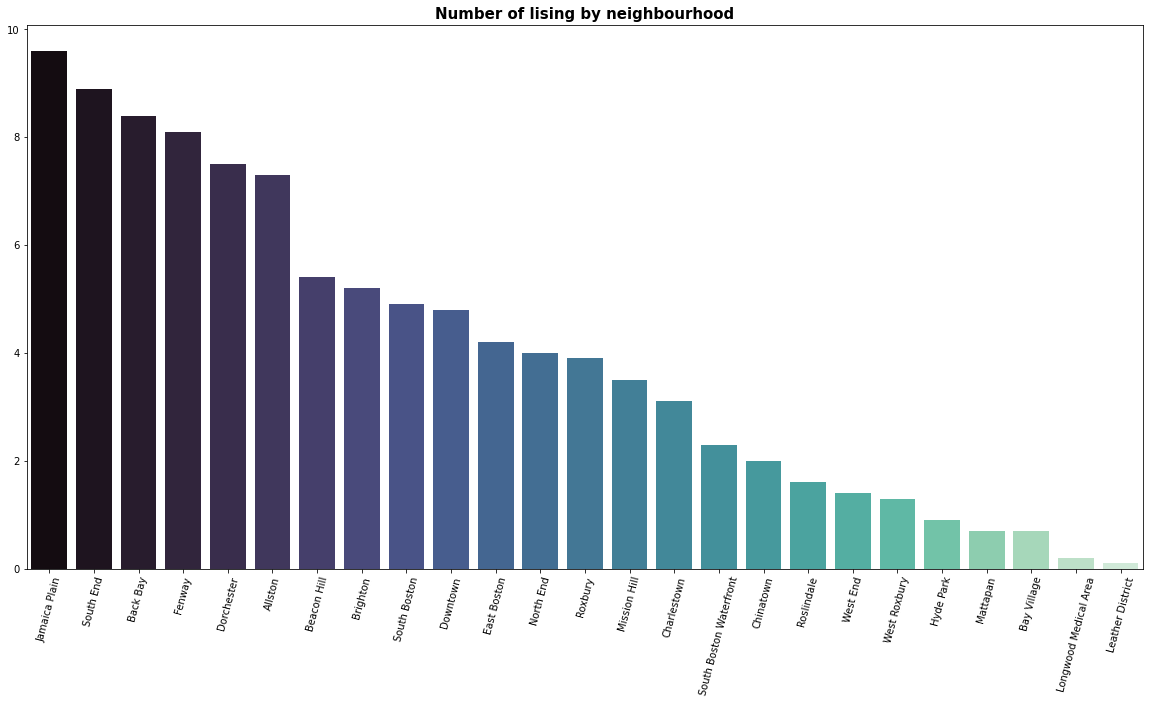

In [383]:
x=df_listings_num['neighbourhood_cleansed'].value_counts().index
y = round((df_listings_num['neighbourhood_cleansed'].value_counts()/df_listings_num.shape[0])*100, 1)

plt.figure(figsize=(20, 10))
sns.barplot(x=x, y=y, order=y.sort_values(ascending=False).index, palette='mako', alpha=1)

plt.title('Number of lising by neighbourhood', weight = 'bold', fontsize = 15)
plt.xticks(rotation = 75);
plt.ylabel('')

plt.savefig('./pictures/Neighbourhoods with highest listing.png', bbox_inches ='tight')


#### 2. Most and least expensive neighborhoods

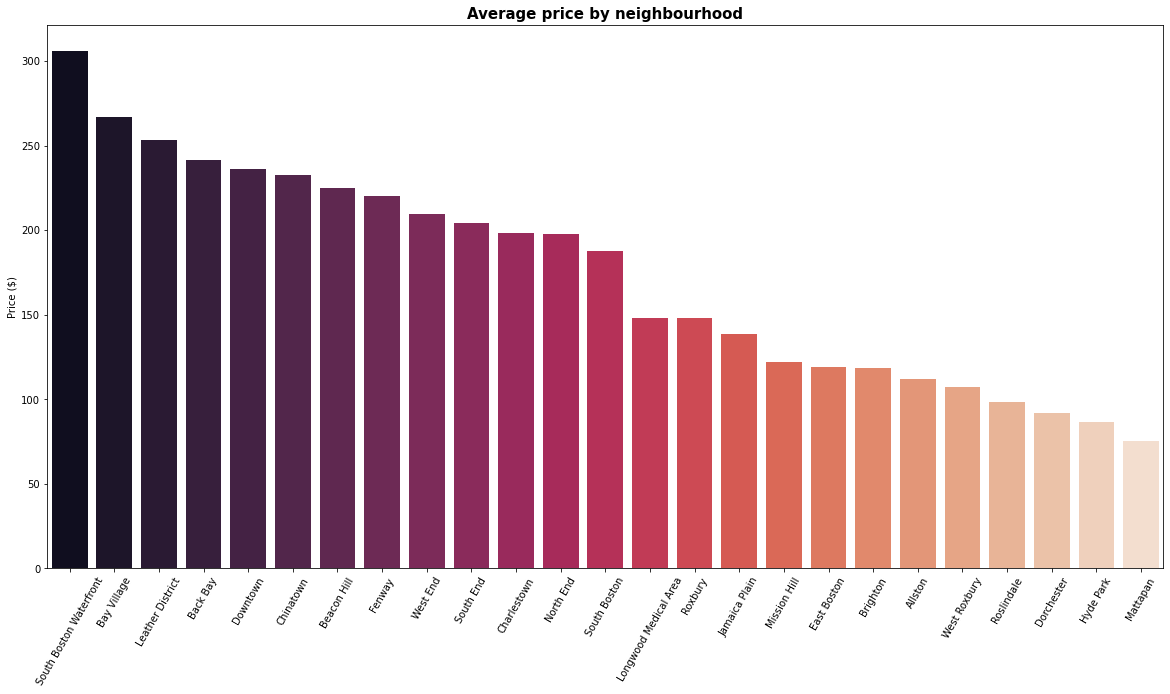

In [384]:
x = df_listings_num.groupby('neighbourhood_cleansed')['price'].mean().index
y = df_listings_num.groupby('neighbourhood_cleansed')['price'].mean()

plt.figure(figsize=(20, 10))
sns.barplot(x=x, y=y, order=y.sort_values(ascending=False).index, palette='rocket', alpha=1)

plt.title('Average price by neighbourhood', weight = 'bold', fontsize = 15)
plt.xticks(rotation = 60)
plt.xlabel('')
plt.ylabel('Price ($)')

plt.savefig('./pictures/Most and least expensive neighborhoods.png', bbox_inches ='tight')

#### 3. Pricing fluctuations in a monthly basis

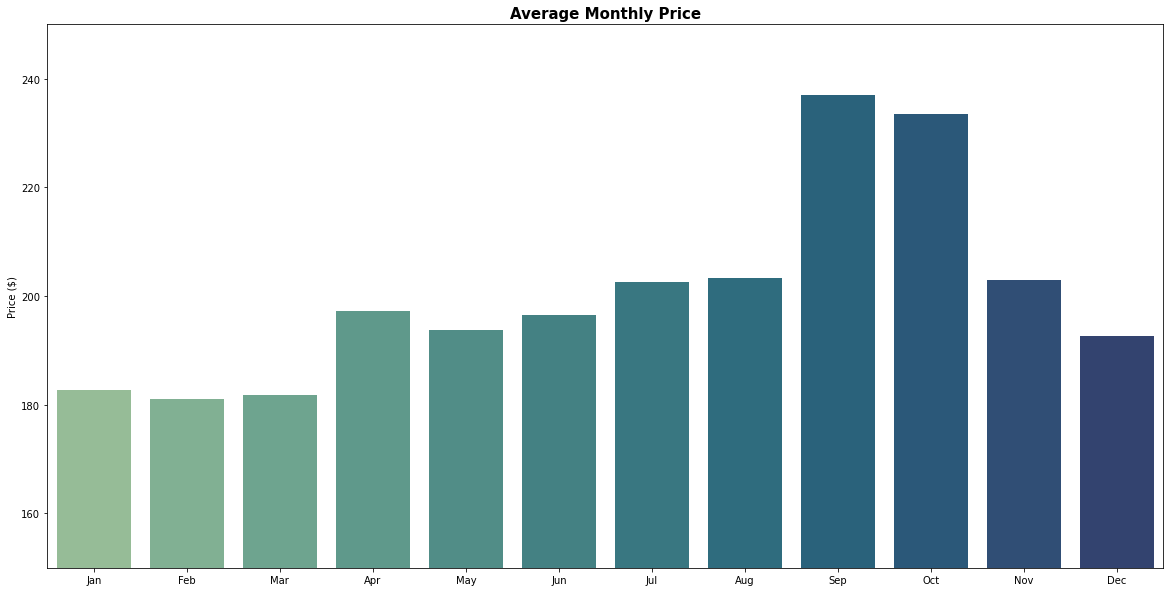

In [385]:
y = df_calendar.groupby('month').mean()['price']

avg_price = {'Jan' : y['Jan'],
'Feb' : y['Feb'],
'Mar' : y['Mar'],
'Apr' : y['Apr'],
'May' : y['May'],
'Jun' : y['Jun'],
'Jul' : y['Jul'],
'Aug' : y['Aug'],
'Sep' : y['Sep'],
'Oct' : y['Oct'],
'Nov' : y['Nov'],
'Dec' : y['Dec']}

plt.figure(figsize=(20,10))
#sns.lineplot(data = avg_price)
sns.barplot(x=list(avg_price.keys()), y=list(avg_price.values()), palette='crest')

plt.title('Average Monthly Price', weight = 'bold', fontsize = 15)
plt.ylim([150, 250])
plt.ylabel('Price ($)')

plt.savefig('./pictures/Pricing fluctations in a monthly basis.png', bbox_inches ='tight')
plt.show()

#### 4. Property types and room types listed the most

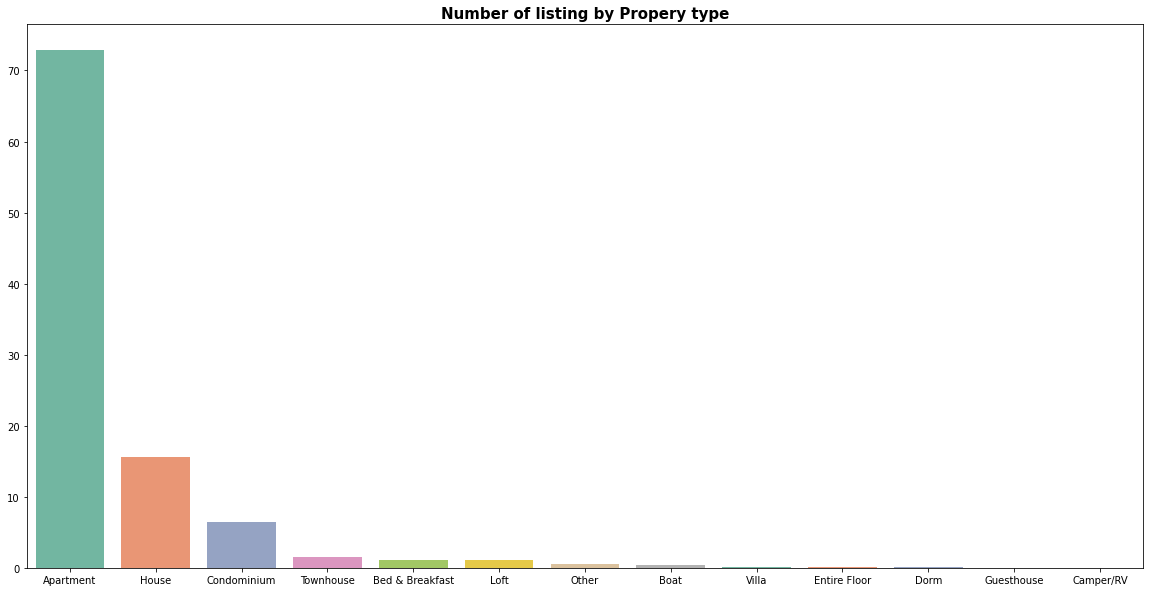

In [386]:
# Property types listing percentage

prop = round(df_listings['property_type'].value_counts() / df_listings.shape[0] * 100, 2)

plt.figure(figsize=(20, 10))
sns.barplot(x = prop.index, y=prop.values, palette='Set2')

plt.title('Number of listing by Propery type', weight = 'bold', fontsize = 15)
plt.savefig('./pictures/Property types listed the most.png', bbox_inches ='tight')



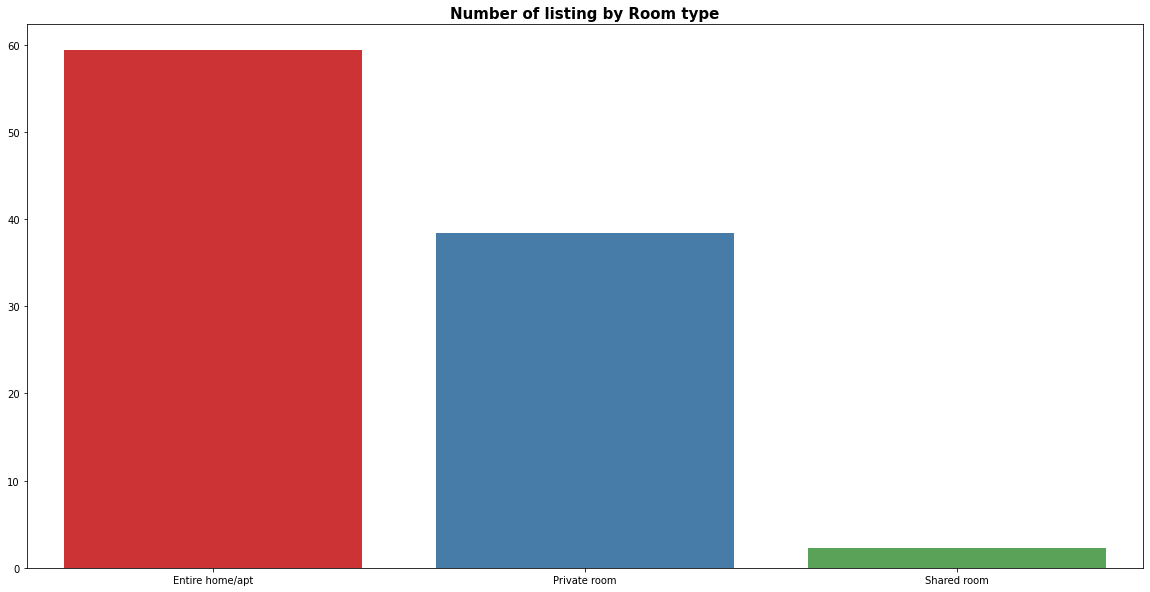

In [387]:
# Room types listing percentage

room = round(df_listings['room_type'].value_counts() / df_listings.shape[0] * 100, 2)

plt.figure(figsize=(20, 10))
sns.barplot(x = room.index, y=room.values, palette='Set1')

plt.title('Number of listing by Room type', weight = 'bold', fontsize = 15)

plt.savefig('./pictures/Room types listed the most.png', bbox_inches ='tight')

#### 5. Features that influence the property pricing

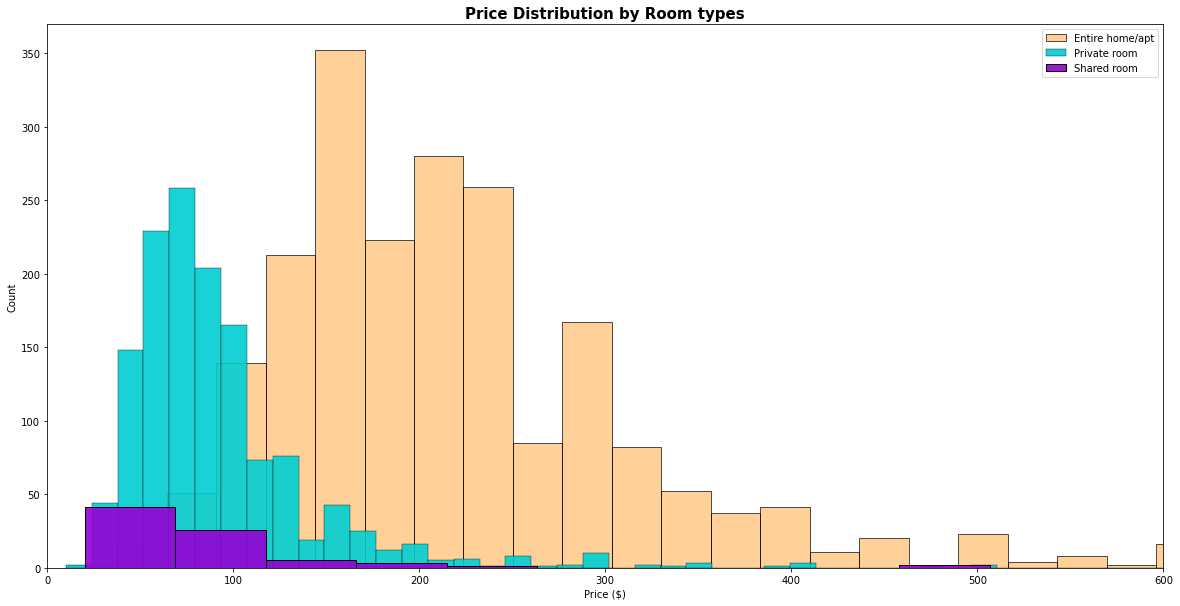

In [388]:
#Price distribution of room types
plt.figure(figsize=(20, 10))

sns.histplot(df_listings_num[df_listings_num['room_type'] == 'Entire home/apt']['price'], kde=False, label='Entire home/apt', color = 'darkorange', alpha = 0.4, bins=150)
sns.histplot(df_listings_num[df_listings_num['room_type'] == 'Private room']['price'],kde=False, label='Private room', color = 'darkturquoise', alpha = 0.9,  bins=100)
sns.histplot(df_listings_num[df_listings_num['room_type'] == 'Shared room']['price'], kde=False, label='Shared room', color = "darkviolet", alpha = 0.9,  bins=15)
plt.xlim(0, 600)
plt.title('Price Distribution by Room types', weight = 'bold', fontsize = 15)
plt.xlabel('Price ($)')
plt.legend();

plt.savefig('./pictures/Room types Price distribution.png', bbox_inches ='tight')

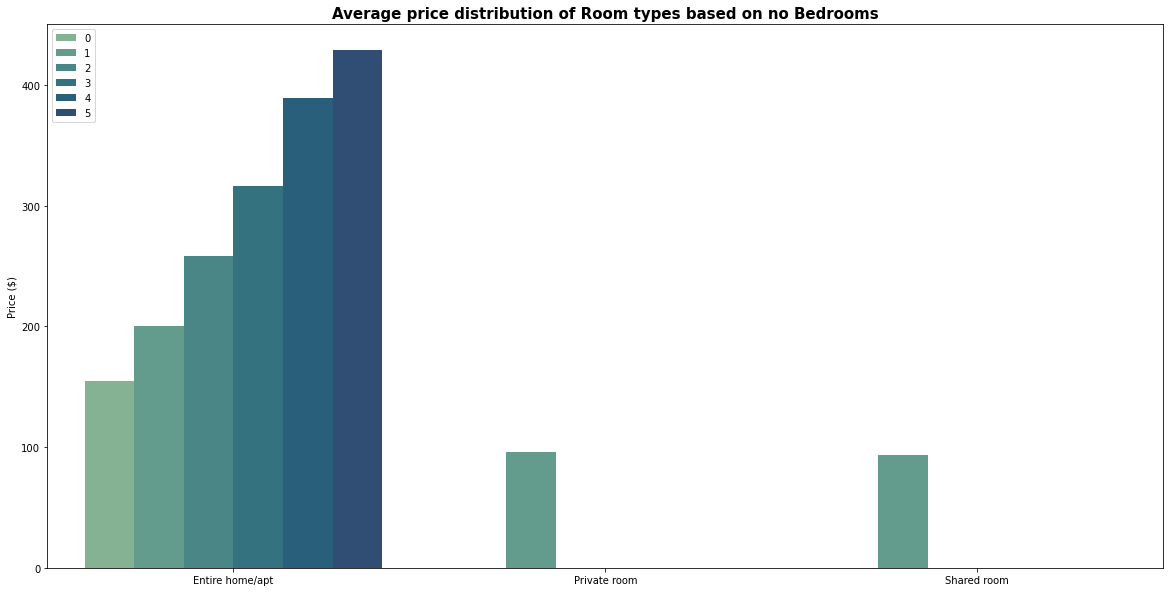

In [389]:
# Price distribution of room types based on the no of bedrooms
plt.figure(figsize=(20, 10))
df_bedroom = df_listings_num.groupby(['room_type', 'bedrooms'], as_index=False).mean()
sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= df_bedroom, palette= 'crest')

plt.title('Average price distribution of Room types based on no Bedrooms', weight = 'bold', fontsize = 15)
plt.xlabel('')
plt.ylabel('Price ($)')
plt.legend();

plt.savefig('./pictures/Number of Bedrooms Price distribution.png', bbox_inches ='tight')

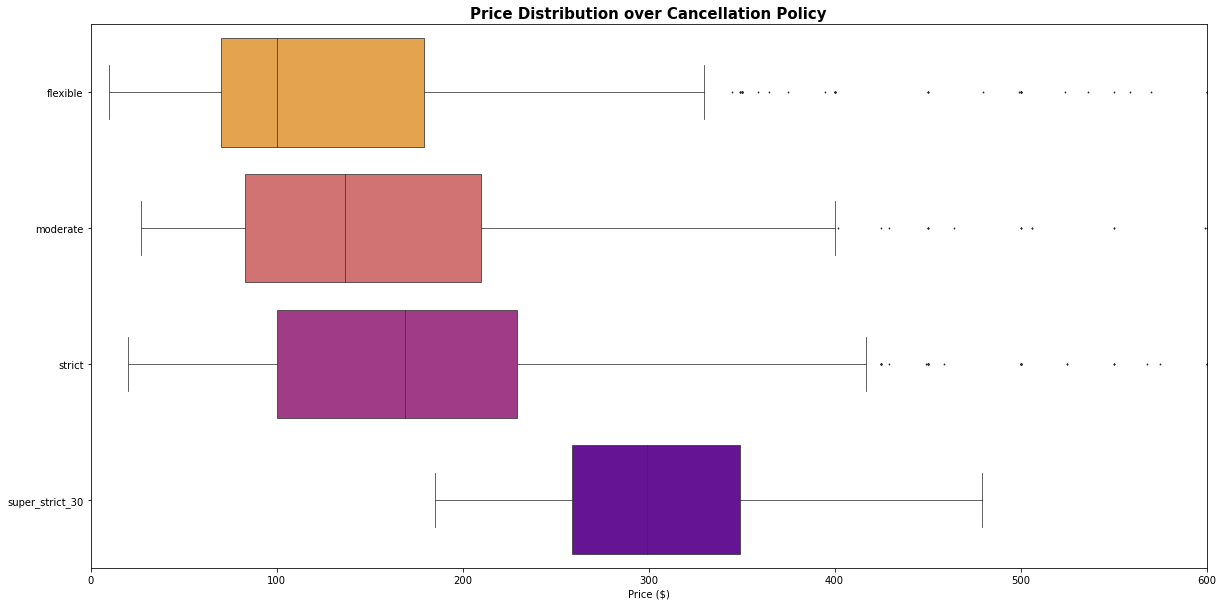

In [390]:
# Analyse how the prices are Cancellation Policy 
plt.figure(figsize=(20, 10))

sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75, data=df_listings_num, palette='plasma_r',
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
plt.xlim(0, 600)
plt.title('Price Distribution over Cancellation Policy', weight = 'bold', fontsize = 15)
plt.xlabel('Price ($)')
plt.ylabel('');

plt.savefig('./pictures/Price vs Cancellation Policy.png', bbox_inches ='tight')


### Predicting Price Model

#### Create the model

In [391]:
# Extract target variable and features
X = df_listings_dummies.drop(labels = ["price"], axis = 1)
y = df_listings_dummies['price']

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# RandomForestRegressor model to predict the prices
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)    
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Predict the property prices using the RandomForestRegressor model
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test) 

#### Evaluate the model

In [392]:
# R2 score

rf_train_score = r2_score(y_train, rf_train_pred)
rf_test_score = r2_score(y_test, rf_test_pred)

print("R² score on training data : {}".format(rf_train_score))
print("R² score on test data : {}".format(rf_test_score))

# Mean Absolute Erros

rf_mae = mean_absolute_error(y_test, rf_test_pred)

print('Mean Absolute Error on test data : {}'.format(rf_mae))


R² score on training data : 0.9139040636012129
R² score on test data : 0.4603537443328003
Mean Absolute Error on test data : 45.3513202247191


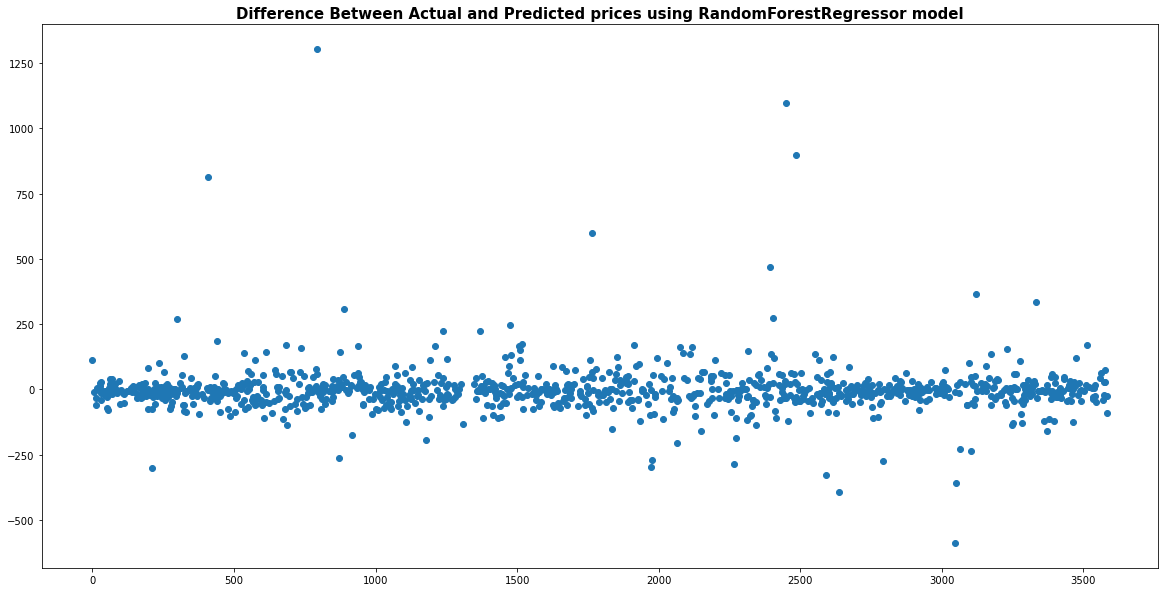

In [394]:
plt.figure(figsize=(20,10))

plt.plot(y_test - rf_test_pred, marker='o',linestyle='')

plt.title('Difference Between Actual and Predicted prices using RandomForestRegressor model', weight = 'bold', fontsize = 15)

plt.savefig('./pictures/Model performance', bbox_inches ='tight')